# Lecture 4 - SciPy


What we have seen so far
- How to setup a python environment and jupyter notebooks
- Basic python language features
- Introduction to NumPy
- Plotting using matplotlib

Scipy is a collection of packages that provide useful mathematical functions commonly used for scientific computing.

List of subpackages
- cluster : Clustering algorithms
- constants : Physical and mathematical constants
- fftpack : Fast Fourier Transform routines
- integrate : Integration and ordinary differential equation solvers
- interpolate : Interpolation and smoothing splines
- io : Input and Output
- linalg : Linear algebra
- ndimage : N-dimensional image processing
- odr : Orthogonal distance regression
- optimize : Optimization and root-finding routines
- signal : Signal processing
- sparse : Sparse matrices and associated routines
- spatial : Spatial data structures and algorithms
- special : Special functions
- stats : Statistical distributions and functions

We cannot cover all of them in detail but we will go through some of the packages and their capabilities today

- interpolate
- optimize
- stats
- integrate

We will also briefly look at some other useful packages
- networkx
- sympy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Interpolation : `scipy.interpolate`

In [2]:
import scipy.interpolate as interp

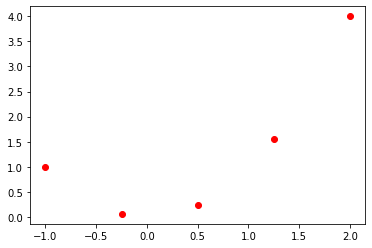

In [3]:
x = np.linspace(-1,2,5);
y = x**2
plt.plot(x,y,'ro')

In [4]:
f = interp.interp1d(x,y,kind="linear")

In [5]:
type(f)

scipy.interpolate.interpolate.interp1d

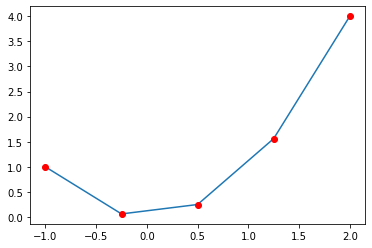

In [6]:
x_fine = np.linspace(-1,2,100)
plt.plot(x_fine,f(x_fine))
plt.plot(x,y,'ro')

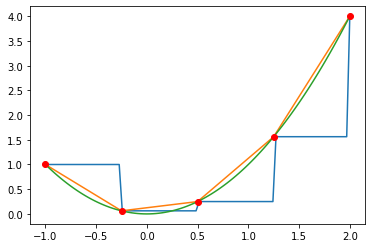

In [7]:
plt.plot(x_fine,interp.interp1d(x,y,kind="zero")(x_fine))
plt.plot(x_fine,interp.interp1d(x,y,kind="linear")(x_fine))
plt.plot(x_fine,interp.interp1d(x,y,kind="cubic")(x_fine))
plt.plot(x,y,'ro')

In [ ]:
interp.interp1d?

In [ ]:
interp.interp2d?

## Optimization : `scipy.optimize`

Contains functions to find minima, roots and fit parameters 

In [8]:
from scipy import optimize

In [9]:
def f(x):
    return x**2 + np.sin(2*x)

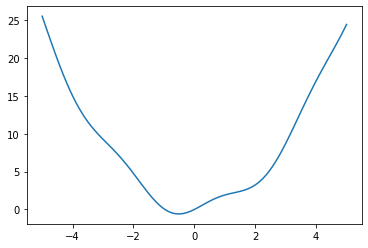

In [10]:
x = np.linspace(-5,5,100)
plt.plot(x,f(x));

In [11]:
results = optimize.minimize(f, -4)
results

      fun: -0.5920740012779424
 hess_inv: array([[0.18432423]])
      jac: array([1.49011612e-07])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 6
     njev: 11
   status: 0
  success: True
        x: array([-0.51493324])

In [12]:
x_opt = results.x

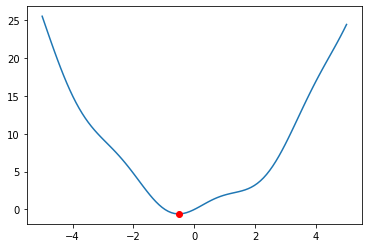

In [13]:
plt.plot(x,f(x));
plt.plot(x_opt,f(x_opt),'ro');

In [ ]:
optimize.minimize?

In [14]:
def f(x):
    return x[0]*x[0] + x[1]*x[1] + 5*(np.sin(2*x[0]) + np.sin(2*x[1]) )

In [15]:
x=np.linspace(-5,5,100)
y=np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y)

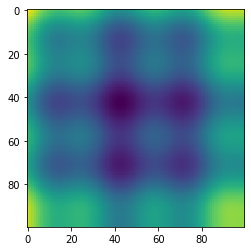

In [16]:
plt.imshow(f((X,Y)))

In [20]:
optimize.minimize(f,x0=[2,2])

      fun: 0.07912876341589659
 hess_inv: array([[ 0.52488677, -0.47511323],
       [-0.47511323,  0.52488677]])
      jac: array([1.1920929e-07, 1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([2.13554766, 2.13554766])

You can use the function `basinhopping` to find the global minima

In [ ]:
optimize.basinhopping(f,[1,4])

In [ ]:
optimize.basinhopping?

## Curve Fitting

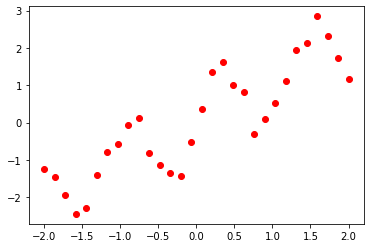

In [21]:
x = np.linspace(-2,2,30)
y = x+np.sin(5.2*x)+0.3*np.random.randn(30)
plt.plot(x,y,'ro')

In [22]:
def f(x,a,b,c):
    return a*x + b*np.sin(c*x)

In [23]:
((a,b,c),cov) = optimize.curve_fit(f,x,y,(0,0,4))
a,b,c

(1.0112575930259058, 1.0024366873075972, 5.1915165536399055)

In [24]:
cov

array([[ 0.001428  , -0.00016983,  0.00077266],
       [-0.00016983,  0.00355949, -0.00031009],
       [ 0.00077266, -0.00031009,  0.00268351]])

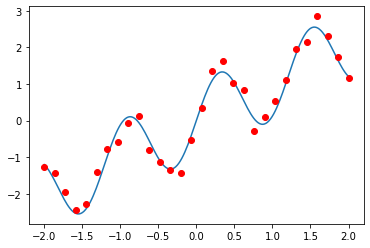

In [25]:
x_fine = np.linspace(-2,2,200)
plt.plot(x_fine,f(x_fine,a,b,c))
plt.plot(x,y,'ro')

### Root Finding

In [26]:
def f(x):
    return (x+2)*(x-1)*(x-5)

In [27]:
optimize.root(f,0)

    fjac: array([[-1.]])
     fun: array([7.99360578e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.11436793e-08])
       r: array([12.00000791])
  status: 1
 success: True
       x: array([1.])

## Statistics : `scipy.stats`

In [28]:
from scipy import stats

Find the maximum likelihood estimate for parameters

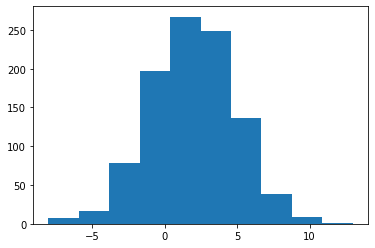

In [29]:
samples = 3*np.random.randn(1000)+2
plt.hist(samples);

In [30]:
stats.norm.fit(samples)

(1.9458130358594379, 2.9667022271670134)

In [31]:
np.mean(samples),np.median(samples)

(1.9458130358594379, 1.996030772212961)

In [32]:
stats.scoreatpercentile(samples,20)

-0.5886852239653766

In [33]:
a = np.random.randn(30)
b = np.random.randn(30) + 0.1

In [34]:
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-1.1920408671206213, pvalue=0.23809979134147563)

You can also perform kernel density estimation

In [ ]:
x = np.concatenate(( 2*np.random.randn(1000)+5,  0.6*np.random.randn(1000)-1) )

In [ ]:
plt.hist(x);

In [ ]:
pdf = stats.kde.gaussian_kde(x)

In [ ]:
counts,bins,_ = plt.hist(x)
x_fine=np.linspace(-2,10,100)
plt.plot(x_fine,np.sum(counts)*pdf(x_fine))

In [ ]:
bins

## Numerical Integration : `scipy.integrate`

In [ ]:
import scipy.integrate as integ

You can compute integral using the `quad` funtion

In [ ]:
def f(x):
    return x**2 + 5*x + np.sin(x)

In [ ]:
integ.quad(f,-1,1)

In [ ]:
integ.quad?

You can also solve ODEs of the form
$$ \frac{dy}{dt} = f(y,t) $$

In [ ]:
def f(y,t):
    return (y[1], -y[1]-9*y[0])

In [ ]:
t = np.linspace(0,10,100)
Y = integ.odeint(f,[1,1],t)

In [ ]:
plt.plot(t,Y[:,1])

# Other useful packages

## `networkx`
Useful Package to handle graphs.

Install by running `conda install networkx`

In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,1)
G.add_edge(3,4)

In [ ]:
nx.draw(G)

In [ ]:
G = nx.complete_graph(10)
nx.draw(G)

## `sympy`

Package for performing symbolic computation and manipulation.

Install it in your environment by running `conda install sympy`

In [ ]:
from sympy import *

In [ ]:
x,y = symbols("x y")

In [ ]:
expr = x+y**2

In [ ]:
x*expr

In [ ]:
expand(x*expr)

In [ ]:
factor(x**2 -2*x*y + y**2)

In [ ]:
latex(expr)

In [ ]:
init_printing()

In [ ]:
simplify( (x-y)**2 + (x+y)**2)

In [ ]:
x**2/(y**3+y)

In [ ]:
(x**2/(y**3+y)).subs(y,1/(1+x))

In [ ]:
(x**2/(y**3+y)).evalf(subs={'x':2, 'y':4})

In [ ]:
Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [ ]:
I = Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [ ]:
I.doit()

In [ ]:
(sin(x)/(1+cos(x)))

In [ ]:
(sin(x)/(1+cos(x))).series(x,0,10)

## Exercises
The following exercises requires the combined usage of the packages we learnt today. 

1. Generate 10 random polynomials of order 5
    - Numerically and analytically integrate them from 0 to 1 and compare the answers.
    - Compute one minima for each polynomial and show that the analytically computed derivative is 0 at the minima
    - Randomly sample the polynomials in the range from 0 to 1, and see if you can recover the original coefficents by trying to fit a 5th order polynomial to the samples.
2. Read and learn about [Erdos-Renyi Random Graphs](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model). See if you can numerically verify some of the properties mentioned in the wiki, such as for what parameter values is the graph most likely connected.